In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4

In [178]:
df = pd.read_csv('./Pokemon.csv')

number_of_Water = 60
number_of_normal = 60

total_train = number_of_Water + number_of_normal

df2.head()
df2 = df[df['Type 1'] =='Water']
df_water_train = df2.iloc[0:number_of_Water]
df_water_test = df2.iloc[number_of_Water:112]

df3 = df[df['Type 1'] =='Normal']
df_Normal_train = df3.iloc[0:number_of_normal]
df_Normal_test = df3.iloc[number_of_normal:98]

train = pd.concat([df_water_train,df_Normal_train],axis=0)
test = pd.concat([df_water_test,df_Normal_test],axis=0)

In [179]:
df.drop(df[(df['Type 1'] =='Ground') | 
           (df['Type 1'] =='Ghost')  |
           (df['Type 1'] =='Dragon') |
           (df['Type 1'] =='Dark') |
           (df['Type 1'] =='Poison') |
           (df['Type 1'] =='Steel') |
           (df['Type 1'] =='Fighting') |
           (df['Type 1'] =='Ice') |
           (df['Type 1'] =='Fairy') |
           (df['Type 1'] =='Flying') ].index,axis=0,inplace=True)

In [180]:
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)

In [181]:
test.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,573,Cinccino,Normal,NaN,470,75,95,60,65,60,115,5,False
1,503,Samurott,Water,NaN,528,95,100,85,108,70,70,5,False
2,693,Clawitzer,Water,NaN,500,71,73,88,120,89,59,6,False
3,647,KeldeoOrdinary Forme,Water,Fighting,580,91,72,90,129,90,108,5,False
4,507,Herdier,Normal,NaN,370,65,80,65,35,65,60,5,False
5,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
6,418,Buizel,Water,NaN,330,55,65,35,60,30,85,4,False
7,536,Palpitoad,Water,Ground,384,75,65,55,65,55,69,5,False
8,585,Deerling,Normal,Grass,335,60,60,50,40,50,75,5,False
9,319,SharpedoMega Sharpedo,Water,Dark,560,70,140,70,110,65,105,3,False


In [182]:
a = (train['Type 1']=='Water').values
a.shape
y_heat=[]
for i in range(len(a)):
    if a[i]==True :
        y_heat.append(1)
    else :
        y_heat.append(0)
        
b = (test['Type 1']=='Water').values
b.shape
y_heat_test=[]
for i in range(len(b)):
    if b[i]==True :
        y_heat_test.append(1)
    else :
        y_heat_test.append(0)
y_heat_test

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0]

In [183]:
Total_matrix_water =   np.array(train['Total'])
HP_matrix_water =      np.array(train['HP'])
Attack_matrix_water =  np.array(train['Attack'])
Defense_matrix_water = np.array(train['Defense'])
SpAtk_matrix_water =   np.array(train['Sp. Atk'])
SpDef_matrix_water =   np.array(train['Sp. Def'])
Speed_matrix_water =   np.array(train['Speed'])

train_data = np.vstack((Total_matrix_water,
                            HP_matrix_water,
                            Attack_matrix_water,
                            Defense_matrix_water,
                            SpAtk_matrix_water,
                            SpDef_matrix_water,
                            Speed_matrix_water)).T

train_data.shape

(120, 7)

In [184]:
Total_matrix_water =   np.array(test['Total'])
HP_matrix_water =      np.array(test['HP'])
Attack_matrix_water =  np.array(test['Attack'])
Defense_matrix_water = np.array(test['Defense'])
SpAtk_matrix_water =   np.array(test['Sp. Atk'])
SpDef_matrix_water =   np.array(test['Sp. Def'])
Speed_matrix_water =   np.array(test['Speed'])

test_data = np.vstack((Total_matrix_water,
                            HP_matrix_water,
                            Attack_matrix_water,
                            Defense_matrix_water,
                            SpAtk_matrix_water,
                            SpDef_matrix_water,
                            Speed_matrix_water)).T

test_data.shape

(90, 7)

In [185]:
train_label = np.array(y_heat)

In [186]:
test_label = np.array(y_heat_test)

In [187]:
test_label.shape

(90,)

In [188]:
train_data
train_label
test_data
test_label

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0])

In [189]:
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

In [190]:
train_label_onehot

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

10000張影像 每次選100張做一個batch

In [191]:
    acc = []
    i = 40
#for i in range(5,50):
    model = Sequential()
    #輸入層：7, 隱藏層：50，輸出層：2
    model.add(Dense(units=i, 
                    input_dim=7,
                    kernel_initializer='normal',
                    activation='relu'))
    model.add(Dense(units=i,
                    kernel_initializer='normal',
                    activation='relu'))
    
    model.add(Dropout(0.1))
    
    model.add(Dense(units=2,
                    kernel_initializer='normal',
                    activation='softmax'))
    #定義訓練方式
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    train_history =model.fit(x=train_data,
                             y=train_label_onehot,
                             validation_split=0.05, 
                             epochs=1500,
                             batch_size=30,
                             verbose=2)

    #評估準確率
    scores = model.evaluate(test_data, test_label_onehot)
    print('\n準確率=',scores[1])
    acc.append(scores[1])

Train on 114 samples, validate on 6 samples
Epoch 1/1500
 - 10s - loss: 0.9503 - acc: 0.5263 - val_loss: 0.7071 - val_acc: 0.5000
Epoch 2/1500
 - 0s - loss: 0.7794 - acc: 0.5088 - val_loss: 0.8550 - val_acc: 0.5000
Epoch 3/1500
 - 0s - loss: 0.8068 - acc: 0.5175 - val_loss: 0.7040 - val_acc: 0.5000
Epoch 4/1500
 - 0s - loss: 0.6860 - acc: 0.5789 - val_loss: 0.6747 - val_acc: 0.5000
Epoch 5/1500
 - 0s - loss: 0.7057 - acc: 0.5000 - val_loss: 0.6780 - val_acc: 0.5000
Epoch 6/1500
 - 0s - loss: 0.6860 - acc: 0.5175 - val_loss: 0.6684 - val_acc: 0.5000
Epoch 7/1500
 - 0s - loss: 0.7036 - acc: 0.4649 - val_loss: 0.6877 - val_acc: 0.3333
Epoch 8/1500
 - 0s - loss: 0.6679 - acc: 0.5526 - val_loss: 0.6810 - val_acc: 0.3333
Epoch 9/1500
 - 0s - loss: 0.6857 - acc: 0.6053 - val_loss: 0.6578 - val_acc: 0.8333
Epoch 10/1500
 - 0s - loss: 0.6624 - acc: 0.6491 - val_loss: 0.6457 - val_acc: 0.8333
Epoch 11/1500
 - 0s - loss: 0.6724 - acc: 0.5439 - val_loss: 0.6420 - val_acc: 0.8333
Epoch 12/1500
 - 0

Epoch 96/1500
 - 0s - loss: 0.4894 - acc: 0.7456 - val_loss: 0.5191 - val_acc: 0.8333
Epoch 97/1500
 - 0s - loss: 0.4847 - acc: 0.7719 - val_loss: 0.4956 - val_acc: 0.8333
Epoch 98/1500
 - 0s - loss: 0.4802 - acc: 0.7368 - val_loss: 0.5445 - val_acc: 0.6667
Epoch 99/1500
 - 0s - loss: 0.4534 - acc: 0.7807 - val_loss: 0.5039 - val_acc: 0.8333
Epoch 100/1500
 - 0s - loss: 0.4603 - acc: 0.7719 - val_loss: 0.5065 - val_acc: 0.8333
Epoch 101/1500
 - 0s - loss: 0.4593 - acc: 0.7807 - val_loss: 0.5179 - val_acc: 0.8333
Epoch 102/1500
 - 0s - loss: 0.4608 - acc: 0.7544 - val_loss: 0.4968 - val_acc: 0.8333
Epoch 103/1500
 - 0s - loss: 0.4537 - acc: 0.7632 - val_loss: 0.5283 - val_acc: 0.8333
Epoch 104/1500
 - 0s - loss: 0.4714 - acc: 0.7632 - val_loss: 0.4908 - val_acc: 0.8333
Epoch 105/1500
 - 0s - loss: 0.4675 - acc: 0.7544 - val_loss: 0.5394 - val_acc: 0.6667
Epoch 106/1500
 - 0s - loss: 0.4435 - acc: 0.7895 - val_loss: 0.4863 - val_acc: 0.8333
Epoch 107/1500
 - 0s - loss: 0.4704 - acc: 0.78

Epoch 191/1500
 - 0s - loss: 0.4190 - acc: 0.7807 - val_loss: 0.4596 - val_acc: 0.8333
Epoch 192/1500
 - 0s - loss: 0.4071 - acc: 0.8070 - val_loss: 0.4389 - val_acc: 0.8333
Epoch 193/1500
 - 0s - loss: 0.3985 - acc: 0.8070 - val_loss: 0.4430 - val_acc: 0.8333
Epoch 194/1500
 - 0s - loss: 0.4078 - acc: 0.8070 - val_loss: 0.4469 - val_acc: 0.8333
Epoch 195/1500
 - 0s - loss: 0.3964 - acc: 0.8509 - val_loss: 0.4392 - val_acc: 0.8333
Epoch 196/1500
 - 0s - loss: 0.4157 - acc: 0.7807 - val_loss: 0.4452 - val_acc: 0.8333
Epoch 197/1500
 - 0s - loss: 0.4258 - acc: 0.7719 - val_loss: 0.4434 - val_acc: 0.8333
Epoch 198/1500
 - 0s - loss: 0.4258 - acc: 0.7719 - val_loss: 0.4303 - val_acc: 0.8333
Epoch 199/1500
 - 0s - loss: 0.3969 - acc: 0.8158 - val_loss: 0.4538 - val_acc: 0.8333
Epoch 200/1500
 - 0s - loss: 0.4022 - acc: 0.8333 - val_loss: 0.4495 - val_acc: 0.8333
Epoch 201/1500
 - 0s - loss: 0.3879 - acc: 0.7895 - val_loss: 0.4711 - val_acc: 0.8333
Epoch 202/1500
 - 0s - loss: 0.3962 - acc: 

 - 0s - loss: 0.3828 - acc: 0.7807 - val_loss: 0.4480 - val_acc: 0.8333
Epoch 286/1500
 - 0s - loss: 0.3431 - acc: 0.8158 - val_loss: 0.4563 - val_acc: 0.8333
Epoch 287/1500
 - 0s - loss: 0.3487 - acc: 0.7982 - val_loss: 0.4718 - val_acc: 0.8333
Epoch 288/1500
 - 0s - loss: 0.3771 - acc: 0.8333 - val_loss: 0.4858 - val_acc: 0.8333
Epoch 289/1500
 - 0s - loss: 0.3771 - acc: 0.7982 - val_loss: 0.4697 - val_acc: 0.8333
Epoch 290/1500
 - 0s - loss: 0.3784 - acc: 0.8246 - val_loss: 0.4905 - val_acc: 0.6667
Epoch 291/1500
 - 0s - loss: 0.3591 - acc: 0.8333 - val_loss: 0.4726 - val_acc: 0.8333
Epoch 292/1500
 - 0s - loss: 0.3672 - acc: 0.7895 - val_loss: 0.4726 - val_acc: 0.8333
Epoch 293/1500
 - 0s - loss: 0.3395 - acc: 0.8421 - val_loss: 0.4674 - val_acc: 0.6667
Epoch 294/1500
 - 0s - loss: 0.3472 - acc: 0.8333 - val_loss: 0.4728 - val_acc: 0.6667
Epoch 295/1500
 - 0s - loss: 0.3506 - acc: 0.8070 - val_loss: 0.4732 - val_acc: 0.8333
Epoch 296/1500
 - 0s - loss: 0.3733 - acc: 0.7982 - val_lo

Epoch 380/1500
 - 0s - loss: 0.2866 - acc: 0.8509 - val_loss: 0.6183 - val_acc: 0.6667
Epoch 381/1500
 - 0s - loss: 0.3186 - acc: 0.8333 - val_loss: 0.5602 - val_acc: 0.6667
Epoch 382/1500
 - 0s - loss: 0.2901 - acc: 0.8596 - val_loss: 0.5960 - val_acc: 0.6667
Epoch 383/1500
 - 0s - loss: 0.3141 - acc: 0.8860 - val_loss: 0.6363 - val_acc: 0.6667
Epoch 384/1500
 - 0s - loss: 0.2725 - acc: 0.8596 - val_loss: 0.6271 - val_acc: 0.6667
Epoch 385/1500
 - 0s - loss: 0.3075 - acc: 0.8333 - val_loss: 0.6158 - val_acc: 0.6667
Epoch 386/1500
 - 0s - loss: 0.3637 - acc: 0.8421 - val_loss: 0.6219 - val_acc: 0.6667
Epoch 387/1500
 - 0s - loss: 0.3170 - acc: 0.8333 - val_loss: 0.6562 - val_acc: 0.6667
Epoch 388/1500
 - 0s - loss: 0.3040 - acc: 0.8772 - val_loss: 0.6207 - val_acc: 0.6667
Epoch 389/1500
 - 0s - loss: 0.2698 - acc: 0.8860 - val_loss: 0.6832 - val_acc: 0.6667
Epoch 390/1500
 - 0s - loss: 0.3092 - acc: 0.8684 - val_loss: 0.6577 - val_acc: 0.6667
Epoch 391/1500
 - 0s - loss: 0.3472 - acc: 

 - 0s - loss: 0.2688 - acc: 0.8772 - val_loss: 0.7343 - val_acc: 0.6667
Epoch 475/1500
 - 0s - loss: 0.2757 - acc: 0.8684 - val_loss: 0.7827 - val_acc: 0.6667
Epoch 476/1500
 - 0s - loss: 0.2268 - acc: 0.8947 - val_loss: 0.7754 - val_acc: 0.6667
Epoch 477/1500
 - 0s - loss: 0.2611 - acc: 0.8772 - val_loss: 0.8142 - val_acc: 0.6667
Epoch 478/1500
 - 0s - loss: 0.3005 - acc: 0.8596 - val_loss: 0.6181 - val_acc: 0.6667
Epoch 479/1500
 - 0s - loss: 0.2774 - acc: 0.8421 - val_loss: 0.6862 - val_acc: 0.6667
Epoch 480/1500
 - 0s - loss: 0.2454 - acc: 0.8684 - val_loss: 0.8644 - val_acc: 0.6667
Epoch 481/1500
 - 0s - loss: 0.2632 - acc: 0.8772 - val_loss: 0.6454 - val_acc: 0.6667
Epoch 482/1500
 - 0s - loss: 0.2629 - acc: 0.8860 - val_loss: 0.5799 - val_acc: 0.6667
Epoch 483/1500
 - 0s - loss: 0.2392 - acc: 0.9035 - val_loss: 0.6898 - val_acc: 0.6667
Epoch 484/1500
 - 0s - loss: 0.2820 - acc: 0.8772 - val_loss: 0.6660 - val_acc: 0.6667
Epoch 485/1500
 - 0s - loss: 0.2594 - acc: 0.8947 - val_lo

Epoch 569/1500
 - 0s - loss: 0.2343 - acc: 0.8596 - val_loss: 0.9585 - val_acc: 0.6667
Epoch 570/1500
 - 0s - loss: 0.2705 - acc: 0.8684 - val_loss: 0.8666 - val_acc: 0.6667
Epoch 571/1500
 - 0s - loss: 0.2417 - acc: 0.8860 - val_loss: 0.8016 - val_acc: 0.6667
Epoch 572/1500
 - 0s - loss: 0.2513 - acc: 0.8684 - val_loss: 0.8974 - val_acc: 0.6667
Epoch 573/1500
 - 0s - loss: 0.2379 - acc: 0.9035 - val_loss: 0.8918 - val_acc: 0.6667
Epoch 574/1500
 - 0s - loss: 0.2288 - acc: 0.8684 - val_loss: 0.8410 - val_acc: 0.6667
Epoch 575/1500
 - 0s - loss: 0.2011 - acc: 0.9211 - val_loss: 0.9227 - val_acc: 0.6667
Epoch 576/1500
 - 0s - loss: 0.2462 - acc: 0.9035 - val_loss: 0.9468 - val_acc: 0.6667
Epoch 577/1500
 - 0s - loss: 0.2168 - acc: 0.9035 - val_loss: 0.9093 - val_acc: 0.6667
Epoch 578/1500
 - 0s - loss: 0.2129 - acc: 0.9298 - val_loss: 1.0400 - val_acc: 0.6667
Epoch 579/1500
 - 0s - loss: 0.2008 - acc: 0.9123 - val_loss: 1.0250 - val_acc: 0.6667
Epoch 580/1500
 - 0s - loss: 0.2360 - acc: 

 - 0s - loss: 0.2057 - acc: 0.9035 - val_loss: 1.0488 - val_acc: 0.6667
Epoch 664/1500
 - 0s - loss: 0.2177 - acc: 0.8947 - val_loss: 0.9992 - val_acc: 0.6667
Epoch 665/1500
 - 0s - loss: 0.1798 - acc: 0.9211 - val_loss: 1.0654 - val_acc: 0.6667
Epoch 666/1500
 - 0s - loss: 0.1866 - acc: 0.9211 - val_loss: 1.0808 - val_acc: 0.6667
Epoch 667/1500
 - 0s - loss: 0.1838 - acc: 0.9211 - val_loss: 1.0573 - val_acc: 0.6667
Epoch 668/1500
 - 0s - loss: 0.2423 - acc: 0.9035 - val_loss: 0.9822 - val_acc: 0.6667
Epoch 669/1500
 - 0s - loss: 0.1806 - acc: 0.9211 - val_loss: 1.0260 - val_acc: 0.6667
Epoch 670/1500
 - 0s - loss: 0.2224 - acc: 0.8947 - val_loss: 1.0752 - val_acc: 0.6667
Epoch 671/1500
 - 0s - loss: 0.1797 - acc: 0.9211 - val_loss: 1.0994 - val_acc: 0.6667
Epoch 672/1500
 - 0s - loss: 0.1775 - acc: 0.9123 - val_loss: 1.0673 - val_acc: 0.6667
Epoch 673/1500
 - 0s - loss: 0.1774 - acc: 0.9386 - val_loss: 1.1135 - val_acc: 0.6667
Epoch 674/1500
 - 0s - loss: 0.1751 - acc: 0.9035 - val_lo

Epoch 758/1500
 - 0s - loss: 0.1722 - acc: 0.9386 - val_loss: 1.0508 - val_acc: 0.6667
Epoch 759/1500
 - 0s - loss: 0.1977 - acc: 0.9035 - val_loss: 1.0259 - val_acc: 0.6667
Epoch 760/1500
 - 0s - loss: 0.1804 - acc: 0.9386 - val_loss: 1.0545 - val_acc: 0.6667
Epoch 761/1500
 - 0s - loss: 0.2314 - acc: 0.8860 - val_loss: 1.0047 - val_acc: 0.6667
Epoch 762/1500
 - 0s - loss: 0.1675 - acc: 0.9386 - val_loss: 1.0969 - val_acc: 0.6667
Epoch 763/1500
 - 0s - loss: 0.2260 - acc: 0.8860 - val_loss: 1.2327 - val_acc: 0.6667
Epoch 764/1500
 - 0s - loss: 0.1769 - acc: 0.9123 - val_loss: 1.1061 - val_acc: 0.6667
Epoch 765/1500
 - 0s - loss: 0.1563 - acc: 0.9298 - val_loss: 1.1249 - val_acc: 0.6667
Epoch 766/1500
 - 0s - loss: 0.2208 - acc: 0.8772 - val_loss: 1.1836 - val_acc: 0.6667
Epoch 767/1500
 - 0s - loss: 0.2479 - acc: 0.8596 - val_loss: 1.1855 - val_acc: 0.6667
Epoch 768/1500
 - 0s - loss: 0.2105 - acc: 0.9123 - val_loss: 1.0132 - val_acc: 0.6667
Epoch 769/1500
 - 0s - loss: 0.1460 - acc: 

 - 0s - loss: 0.1642 - acc: 0.9298 - val_loss: 1.0564 - val_acc: 0.6667
Epoch 853/1500
 - 0s - loss: 0.1546 - acc: 0.9386 - val_loss: 1.1419 - val_acc: 0.6667
Epoch 854/1500
 - 0s - loss: 0.1829 - acc: 0.9035 - val_loss: 1.1087 - val_acc: 0.6667
Epoch 855/1500
 - 0s - loss: 0.1435 - acc: 0.9386 - val_loss: 1.2171 - val_acc: 0.6667
Epoch 856/1500
 - 0s - loss: 0.1775 - acc: 0.9386 - val_loss: 1.3400 - val_acc: 0.6667
Epoch 857/1500
 - 0s - loss: 0.1418 - acc: 0.9649 - val_loss: 1.3329 - val_acc: 0.6667
Epoch 858/1500
 - 0s - loss: 0.1507 - acc: 0.9561 - val_loss: 1.3444 - val_acc: 0.6667
Epoch 859/1500
 - 0s - loss: 0.1233 - acc: 0.9737 - val_loss: 1.4659 - val_acc: 0.6667
Epoch 860/1500
 - 0s - loss: 0.1340 - acc: 0.9474 - val_loss: 1.3389 - val_acc: 0.6667
Epoch 861/1500
 - 0s - loss: 0.1351 - acc: 0.9386 - val_loss: 1.2766 - val_acc: 0.6667
Epoch 862/1500
 - 0s - loss: 0.1338 - acc: 0.9474 - val_loss: 1.2592 - val_acc: 0.6667
Epoch 863/1500
 - 0s - loss: 0.1331 - acc: 0.9474 - val_lo

Epoch 947/1500
 - 0s - loss: 0.1335 - acc: 0.9386 - val_loss: 1.5451 - val_acc: 0.6667
Epoch 948/1500
 - 0s - loss: 0.1162 - acc: 0.9649 - val_loss: 1.5204 - val_acc: 0.6667
Epoch 949/1500
 - 0s - loss: 0.1037 - acc: 0.9561 - val_loss: 1.3843 - val_acc: 0.6667
Epoch 950/1500
 - 0s - loss: 0.1196 - acc: 0.9561 - val_loss: 1.3402 - val_acc: 0.6667
Epoch 951/1500
 - 0s - loss: 0.1313 - acc: 0.9474 - val_loss: 1.2587 - val_acc: 0.6667
Epoch 952/1500
 - 0s - loss: 0.0918 - acc: 0.9912 - val_loss: 1.2719 - val_acc: 0.6667
Epoch 953/1500
 - 0s - loss: 0.1200 - acc: 0.9649 - val_loss: 1.4547 - val_acc: 0.6667
Epoch 954/1500
 - 0s - loss: 0.1169 - acc: 0.9561 - val_loss: 1.5308 - val_acc: 0.6667
Epoch 955/1500
 - 0s - loss: 0.1182 - acc: 0.9737 - val_loss: 1.4399 - val_acc: 0.6667
Epoch 956/1500
 - 0s - loss: 0.1261 - acc: 0.9561 - val_loss: 1.4293 - val_acc: 0.6667
Epoch 957/1500
 - 0s - loss: 0.1108 - acc: 0.9561 - val_loss: 1.4213 - val_acc: 0.6667
Epoch 958/1500
 - 0s - loss: 0.1736 - acc: 

Epoch 1041/1500
 - 0s - loss: 0.1351 - acc: 0.9561 - val_loss: 1.4952 - val_acc: 0.6667
Epoch 1042/1500
 - 0s - loss: 0.1307 - acc: 0.9649 - val_loss: 1.4396 - val_acc: 0.6667
Epoch 1043/1500
 - 0s - loss: 0.1171 - acc: 0.9649 - val_loss: 1.6397 - val_acc: 0.6667
Epoch 1044/1500
 - 0s - loss: 0.1083 - acc: 0.9737 - val_loss: 1.4738 - val_acc: 0.6667
Epoch 1045/1500
 - 0s - loss: 0.1664 - acc: 0.9386 - val_loss: 1.5536 - val_acc: 0.6667
Epoch 1046/1500
 - 0s - loss: 0.1604 - acc: 0.9211 - val_loss: 1.5797 - val_acc: 0.6667
Epoch 1047/1500
 - 0s - loss: 0.1491 - acc: 0.9211 - val_loss: 1.5423 - val_acc: 0.6667
Epoch 1048/1500
 - 0s - loss: 0.0881 - acc: 0.9825 - val_loss: 1.5625 - val_acc: 0.6667
Epoch 1049/1500
 - 0s - loss: 0.1306 - acc: 0.9561 - val_loss: 1.5444 - val_acc: 0.6667
Epoch 1050/1500
 - 0s - loss: 0.1114 - acc: 0.9474 - val_loss: 1.5392 - val_acc: 0.6667
Epoch 1051/1500
 - 0s - loss: 0.1070 - acc: 0.9561 - val_loss: 1.5094 - val_acc: 0.6667
Epoch 1052/1500
 - 0s - loss: 0.

 - 0s - loss: 0.0751 - acc: 0.9912 - val_loss: 1.3426 - val_acc: 0.6667
Epoch 1135/1500
 - 0s - loss: 0.0851 - acc: 0.9737 - val_loss: 1.2782 - val_acc: 0.6667
Epoch 1136/1500
 - 0s - loss: 0.1240 - acc: 0.9386 - val_loss: 1.2939 - val_acc: 0.6667
Epoch 1137/1500
 - 0s - loss: 0.1179 - acc: 0.9474 - val_loss: 1.3807 - val_acc: 0.6667
Epoch 1138/1500
 - 0s - loss: 0.0914 - acc: 0.9825 - val_loss: 1.4409 - val_acc: 0.6667
Epoch 1139/1500
 - 0s - loss: 0.0992 - acc: 0.9737 - val_loss: 1.5558 - val_acc: 0.6667
Epoch 1140/1500
 - 0s - loss: 0.0646 - acc: 0.9912 - val_loss: 1.6814 - val_acc: 0.6667
Epoch 1141/1500
 - 0s - loss: 0.1186 - acc: 0.9561 - val_loss: 1.5774 - val_acc: 0.6667
Epoch 1142/1500
 - 0s - loss: 0.0818 - acc: 0.9737 - val_loss: 1.4198 - val_acc: 0.6667
Epoch 1143/1500
 - 0s - loss: 0.1514 - acc: 0.9298 - val_loss: 1.5448 - val_acc: 0.6667
Epoch 1144/1500
 - 0s - loss: 0.1117 - acc: 0.9386 - val_loss: 1.6068 - val_acc: 0.6667
Epoch 1145/1500
 - 0s - loss: 0.1002 - acc: 0.97

Epoch 1228/1500
 - 0s - loss: 0.1536 - acc: 0.9474 - val_loss: 1.4517 - val_acc: 0.6667
Epoch 1229/1500
 - 0s - loss: 0.1189 - acc: 0.9649 - val_loss: 1.2822 - val_acc: 0.6667
Epoch 1230/1500
 - 0s - loss: 0.0864 - acc: 0.9912 - val_loss: 1.2770 - val_acc: 0.6667
Epoch 1231/1500
 - 0s - loss: 0.1456 - acc: 0.9561 - val_loss: 1.6637 - val_acc: 0.6667
Epoch 1232/1500
 - 0s - loss: 0.1480 - acc: 0.9737 - val_loss: 1.9931 - val_acc: 0.6667
Epoch 1233/1500
 - 0s - loss: 0.0925 - acc: 0.9649 - val_loss: 2.0191 - val_acc: 0.6667
Epoch 1234/1500
 - 0s - loss: 0.0972 - acc: 0.9737 - val_loss: 1.9198 - val_acc: 0.6667
Epoch 1235/1500
 - 0s - loss: 0.0720 - acc: 0.9825 - val_loss: 1.8593 - val_acc: 0.6667
Epoch 1236/1500
 - 0s - loss: 0.0915 - acc: 0.9649 - val_loss: 1.7226 - val_acc: 0.6667
Epoch 1237/1500
 - 0s - loss: 0.0984 - acc: 0.9649 - val_loss: 1.6850 - val_acc: 0.6667
Epoch 1238/1500
 - 0s - loss: 0.0705 - acc: 0.9825 - val_loss: 1.7303 - val_acc: 0.6667
Epoch 1239/1500
 - 0s - loss: 0.

Epoch 1322/1500
 - 0s - loss: 0.0998 - acc: 0.9649 - val_loss: 2.2601 - val_acc: 0.6667
Epoch 1323/1500
 - 0s - loss: 0.0785 - acc: 0.9737 - val_loss: 2.3293 - val_acc: 0.6667
Epoch 1324/1500
 - 0s - loss: 0.0699 - acc: 0.9825 - val_loss: 2.2454 - val_acc: 0.6667
Epoch 1325/1500
 - 0s - loss: 0.0714 - acc: 0.9649 - val_loss: 2.1203 - val_acc: 0.6667
Epoch 1326/1500
 - 0s - loss: 0.0659 - acc: 0.9737 - val_loss: 1.8780 - val_acc: 0.6667
Epoch 1327/1500
 - 0s - loss: 0.0964 - acc: 0.9561 - val_loss: 1.7755 - val_acc: 0.6667
Epoch 1328/1500
 - 0s - loss: 0.0823 - acc: 0.9649 - val_loss: 1.8185 - val_acc: 0.6667
Epoch 1329/1500
 - 0s - loss: 0.0851 - acc: 0.9737 - val_loss: 2.2995 - val_acc: 0.6667
Epoch 1330/1500
 - 0s - loss: 0.1337 - acc: 0.9561 - val_loss: 2.2490 - val_acc: 0.6667
Epoch 1331/1500
 - 0s - loss: 0.0798 - acc: 0.9737 - val_loss: 1.8502 - val_acc: 0.6667
Epoch 1332/1500
 - 0s - loss: 0.0734 - acc: 0.9649 - val_loss: 1.7342 - val_acc: 0.6667
Epoch 1333/1500
 - 0s - loss: 0.

 - 0s - loss: 0.0367 - acc: 1.0000 - val_loss: 2.2953 - val_acc: 0.6667
Epoch 1416/1500
 - 0s - loss: 0.0610 - acc: 0.9825 - val_loss: 2.3920 - val_acc: 0.6667
Epoch 1417/1500
 - 0s - loss: 0.0565 - acc: 0.9825 - val_loss: 2.2588 - val_acc: 0.6667
Epoch 1418/1500
 - 0s - loss: 0.0526 - acc: 0.9912 - val_loss: 2.1836 - val_acc: 0.6667
Epoch 1419/1500
 - 0s - loss: 0.0754 - acc: 0.9825 - val_loss: 2.1041 - val_acc: 0.6667
Epoch 1420/1500
 - 0s - loss: 0.0832 - acc: 0.9825 - val_loss: 2.1998 - val_acc: 0.6667
Epoch 1421/1500
 - 0s - loss: 0.0439 - acc: 0.9912 - val_loss: 2.1559 - val_acc: 0.6667
Epoch 1422/1500
 - 0s - loss: 0.0961 - acc: 0.9561 - val_loss: 2.0196 - val_acc: 0.6667
Epoch 1423/1500
 - 0s - loss: 0.0662 - acc: 0.9825 - val_loss: 2.1225 - val_acc: 0.6667
Epoch 1424/1500
 - 0s - loss: 0.0792 - acc: 0.9825 - val_loss: 2.3926 - val_acc: 0.6667
Epoch 1425/1500
 - 0s - loss: 0.0827 - acc: 0.9649 - val_loss: 2.4613 - val_acc: 0.6667
Epoch 1426/1500
 - 0s - loss: 0.0716 - acc: 0.98

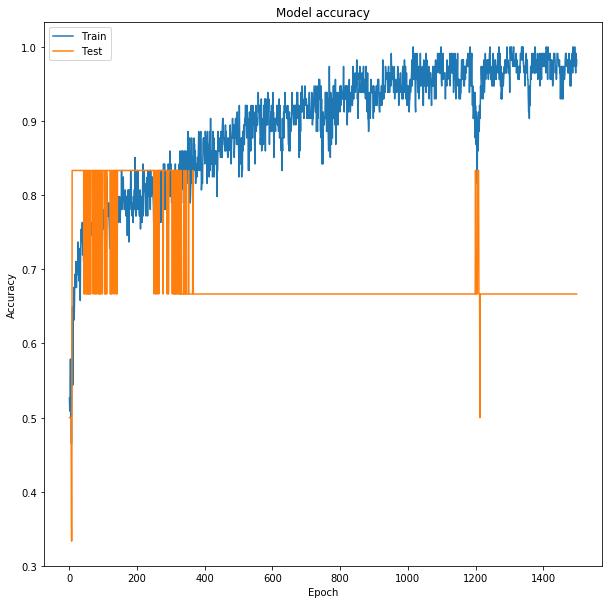

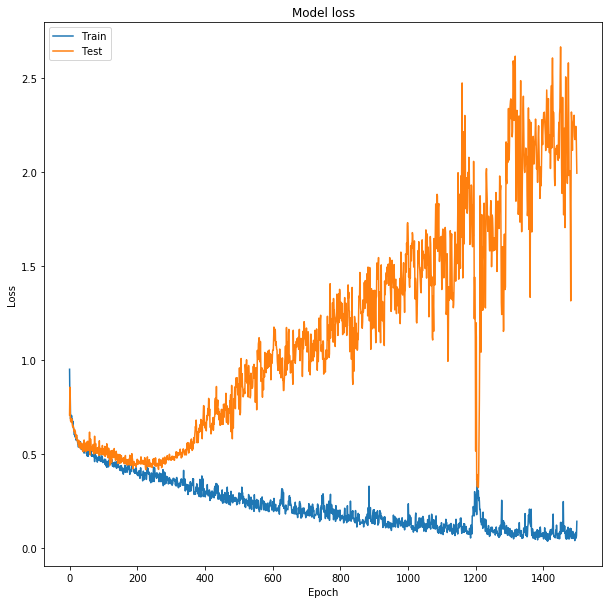

In [192]:
# 绘制训练 & 验证的准确率值
plt.figure(figsize=(10, 10))
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.figure(figsize=(10, 10))
# 绘制训练 & 验证的损失值
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()